In [1]:
import numpy as np

from scipy.optimize import minimize_scalar, newton, fsolve
from scipy.integrate import quad
import scipy.signal as sig
from scipy.special import erf, spherical_jn
from scipy.interpolate import CubicSpline, interp1d

import matplotlib.pyplot as plt
from nugget_rate_v2 import *

In [2]:
## General Prameters
hbarc = 0.2     # eV um
rho_T = 2.0e3   # Sphere density, kg/m^3
mAMU = 1.66e-27 # Neutron mass

R_um = 5          # Sphere radius, um
R = R_um / hbarc  # Radius in natural units, eV^-1
N_T = 0.5 * ( 4/3 * np.pi * (R_um*1e-6)**3) * rho_T/mAMU # Number of neutrons
res = 170e6       # detector resolution in eV
q_thr = 0.05e9    # momentum threshold, eV

## DM parameters
# For DM velocity distribution
vmin = 5e-5      # minimum velocity to consider, natural units (c)
vesc = 1.815e-3  # galactic escape velocity
v0 = 7.34e-4     # v0 parameter from Zurek group paper
ve = 8.172e-4    # ve parameter from Zurek group paper

In [3]:
M_X_in = 5e3
alpha_n_in = 1e-8
m_phi = 1e-3
point_charge = False

In [4]:
M_X = M_X_in * 1e9    # Dark matter nugget mass, eV (assumes mass in GeV given on command line)
m_chi = 0.01 * 1e9    # eV
N_chi = M_X / m_chi   # Number of dark matter particles in the nugget

rhoDM = 0.3e9         # dark matter mass density, eV/cm^3
alpha_n = alpha_n_in  # Dimensionless single neutron-nugget coupling
alpha = alpha_n * N_T # Coupling of the entire sphere
mR = m_phi * R        # (= R/lambda), a useful length scale; now defiend in `vtot()`

## Start calculation
nvels = 2000      # Number of velocities to include in integration
vlist = np.linspace(vmin, vesc, nvels)
pmax = np.max((vesc * M_X, 10e9))

In [5]:
verr = 0.0002654377188594297
verr = vlist[ np.argmin(np.abs(vlist - verr)) ]

In [6]:
p, b, theta = b_theta(M_X, m_phi, alpha, verr, point_charge)

/vast/palmer/home.grace/yt388/microspheres/impulse/yuhan/nugget_rate_v2.py:144: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(first_term + second_term)
/vast/palmer/home.grace/yt388/microspheres/impulse/yuhan/nugget_rate_v2.py:161: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Psi[i] = quad(integrand, 0, 1, args=(umax[i], E, _b, m_phi, alpha, point_charge))[0]


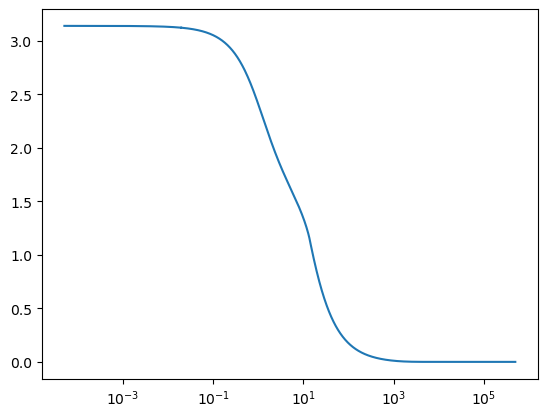

In [7]:
plt.plot(b, theta)
plt.xscale('log')

In [10]:
# Take care of nan in theta from integration
not_nan = np.logical_not(np.isnan(theta))
b = b[not_nan]
theta = theta[not_nan]

# Most of the time there is a maximum point
# in the theta-b plot
# Split contribution above and below critical point
bcidx = np.argmax(theta)
bcrit = b[bcidx]

## now need the cross section above and below bcrit
b1, t1 = b[:bcidx], theta[:bcidx]
b2, t2 = b[bcidx:], theta[bcidx:]

q1 = p * np.sqrt( 2*(1-np.cos(t1)) )
q2 = p * np.sqrt( 2*(1-np.cos(t2)) )
q = p * np.sqrt( 2*(1-np.cos(theta)) )

In [12]:
q_lin = np.linspace(0, 2*pmax*1.1, 10000)
if(len(b1) > 1 ):
    q1_sorted, q1_idx = np.unique(q1, return_index=True)
    b1_cubic = CubicSpline(q1[q1_idx], b1[q1_idx])(q1[q1_idx])
    db1 = np.abs(np.gradient(b1_cubic, q1[q1_idx]))

q2_sorted, q2_idx = np.unique(q2, return_index=True)
b2_cubic = CubicSpline(q2[q2_idx], b2[q2_idx])(q2[q2_idx])
db2 = np.abs(np.gradient(b2_cubic, q2[q2_idx]))

In [14]:
q2_sorted.shape

(1679,)

In [8]:
qq, dsdq = dsig_dq(p, pmax, b, theta)

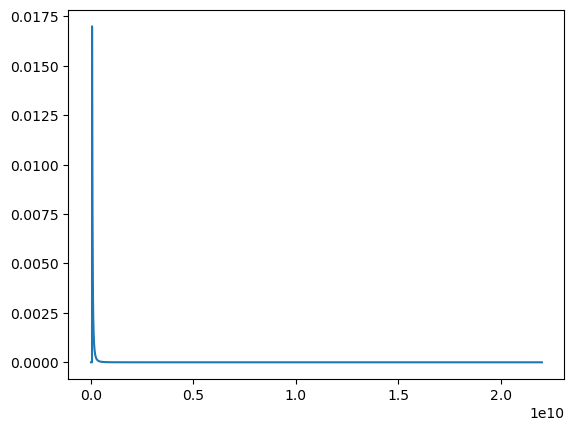

In [9]:
plt.plot(qq, dsdq)

In [ ]:
bcidx = np.argmax(theta)
bcrit = b[bcidx]

## now need the cross section above and below bcrit
b1, t1 = b[:bcidx], theta[:bcidx]
b2, t2 = b[bcidx:], theta[bcidx:]

q1 = p * np.sqrt( 2*(1-np.cos(t1)) )
q2 = p * np.sqrt( 2*(1-np.cos(t2)) )
q = p * np.sqrt( 2*(1-np.cos(theta)) )

In [ ]:
t2

In [ ]:
plt.plot(b1, t1)
plt.xscale('log')

In [ ]:
b[np.logical_not(np.isnan(theta))].shape